#import library
Here we use pyforest library include numpy as np, pandas as pd,matplotlib as mp

In [1]:
pip install pyforest


In [2]:
import pyforest

#reading the train data and test

In [ ]:
data_train=pd.read_csv('Train.csv')
data_test=pd.read_csv('test.csv')

#check the data
data_train/data_test

In [5]:
data_train.shape

(8523, 12)

In [6]:
data_test.shape

(5681, 11)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
data_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
items =data_train['Outlet_Size'].value_counts()
items

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
items =data_train['Item_Identifier'].value_counts()
items

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [13]:
items =data_train['Outlet_Identifier'].value_counts()
items

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [14]:
items =data_train['Item_Fat_Content'].value_counts()
items

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#check the null values

In [15]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#Klib_Library

In [ ]:
pip install klib

In [18]:
import klib

<Axes: title={'center': 'Feature-correlation (pearson)'}>

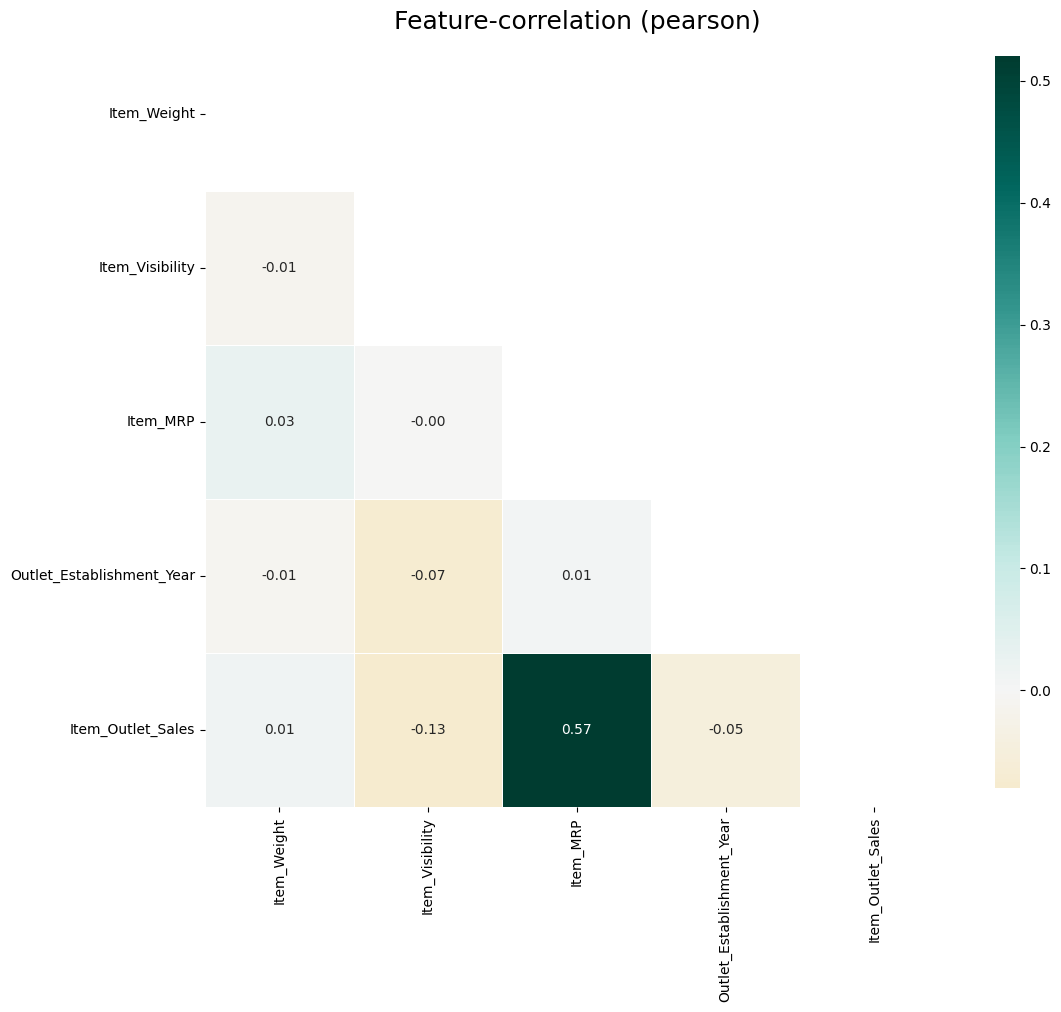

In [19]:
#representation of correlations with the feature column
klib.corr_plot(data_train)

GridSpec(6, 6)

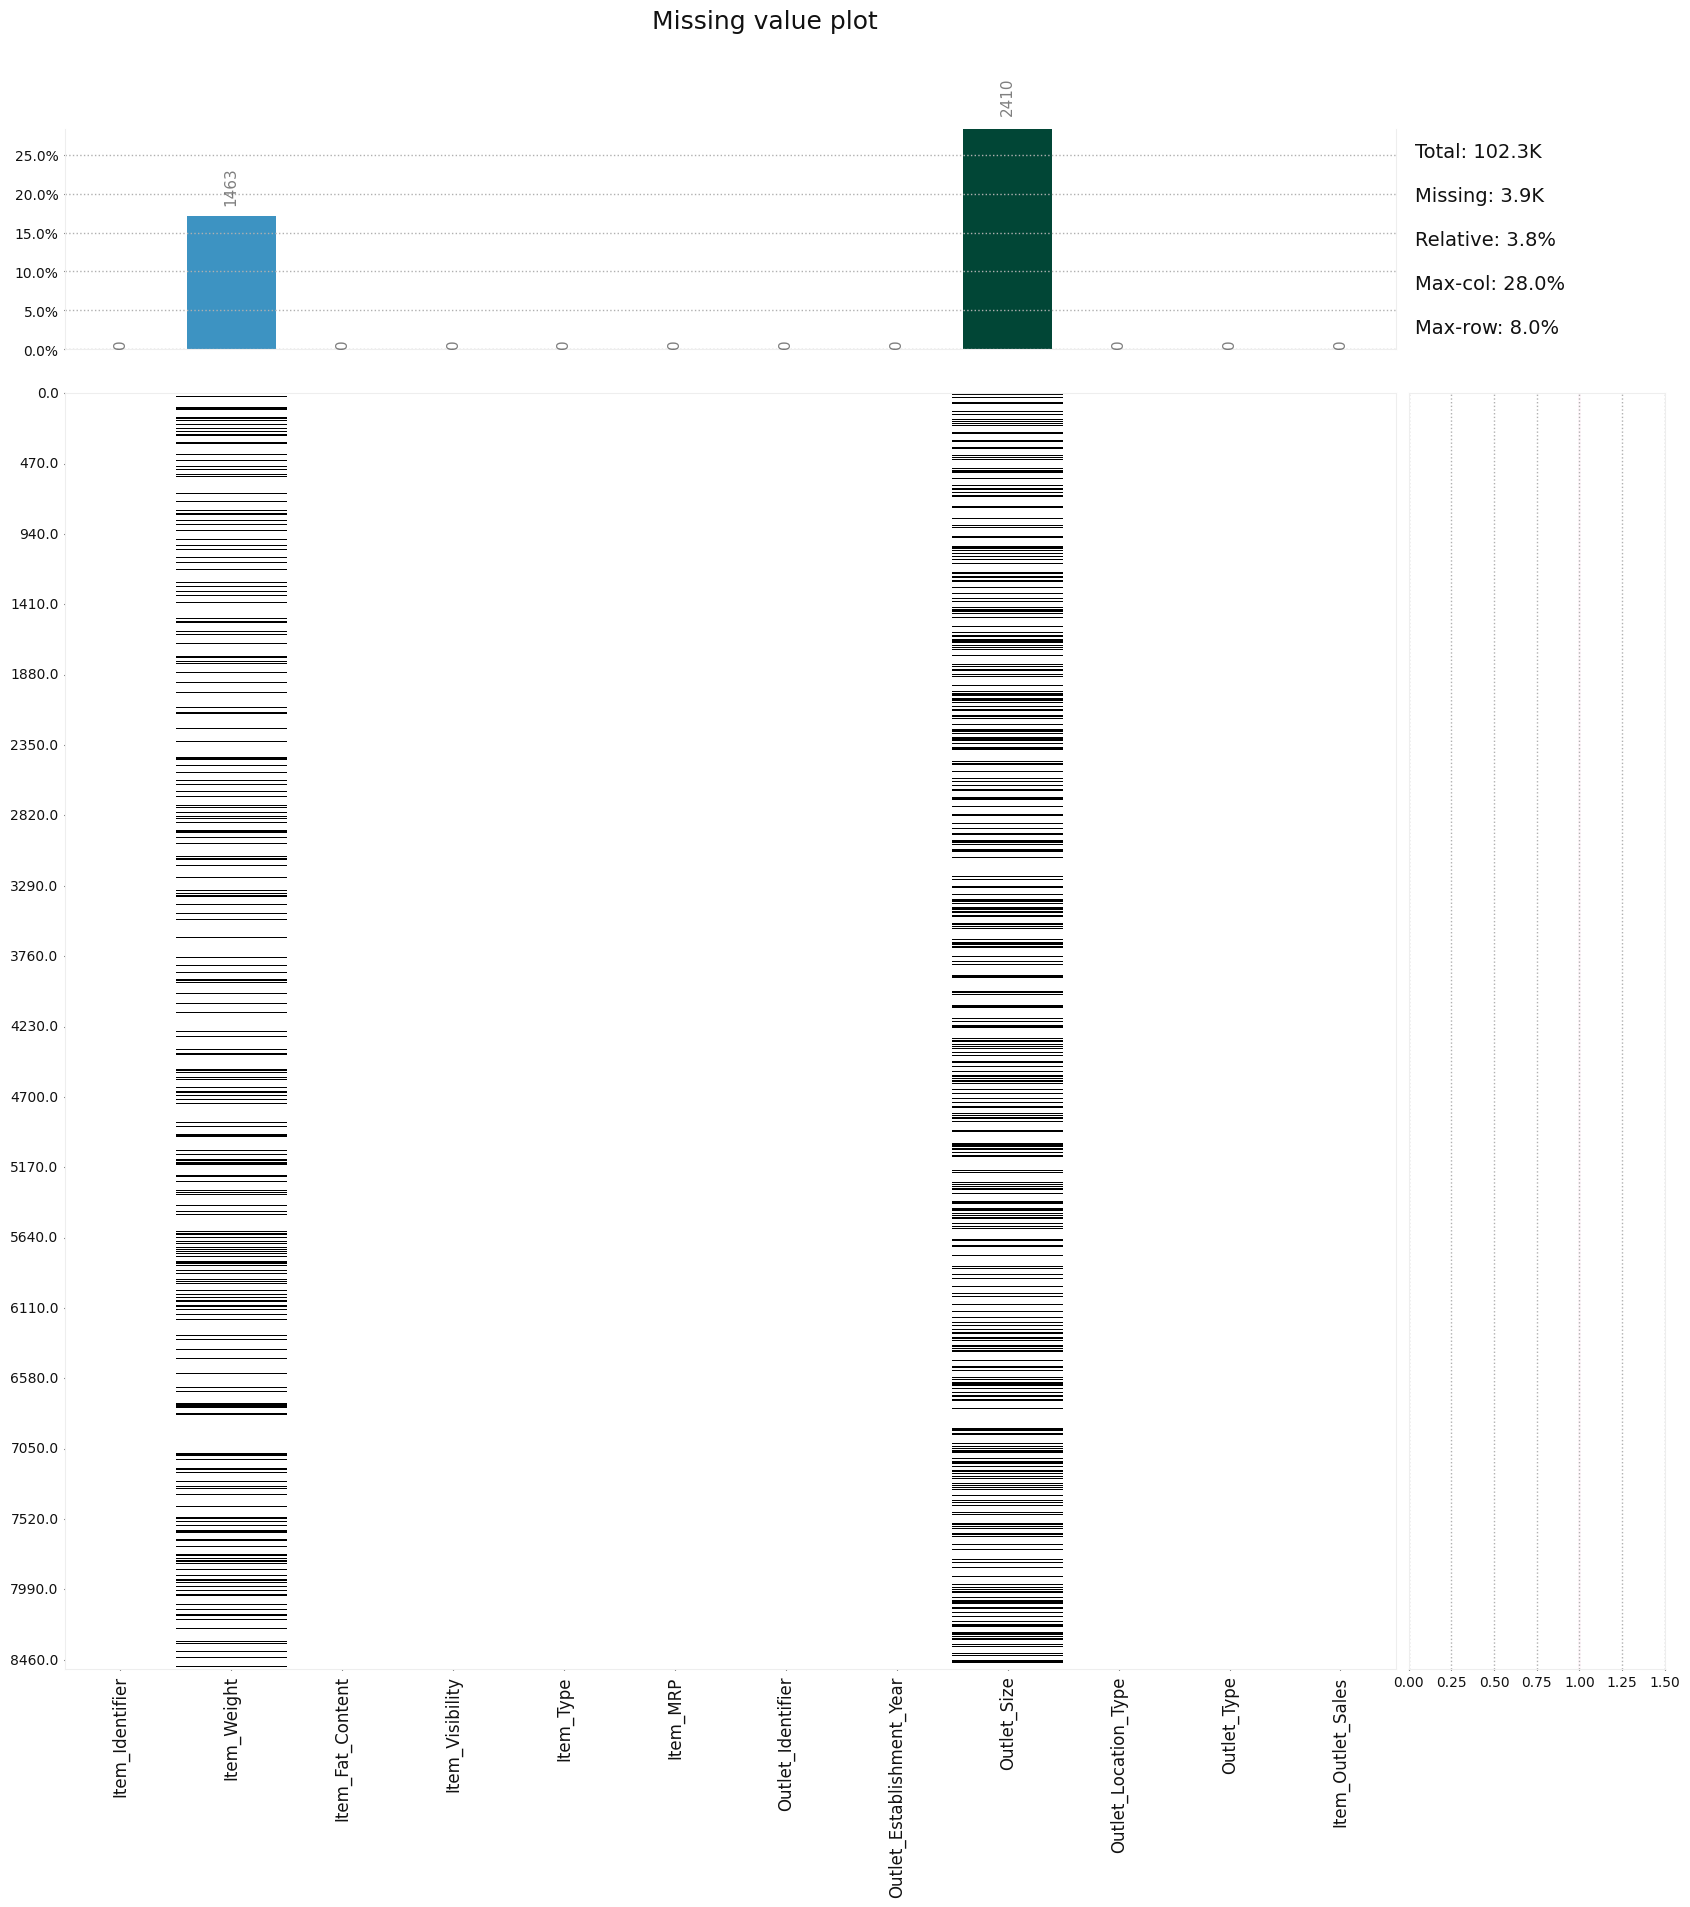

In [20]:
# returns a figure containing information about missing values
klib.missingval_plot(data_train)

#handle nullvalues
 handle nullvalue by fillna

In [21]:
data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean(),inplace=True)
data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean(),inplace=True)

In [22]:
data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0],inplace=True)
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0],inplace=True)

In [23]:
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#Selecting feature
Selecting features based on our general requirements

<IPython.core.display.Javascript object>

<Axes: xlabel='Item_Fat_Content'>

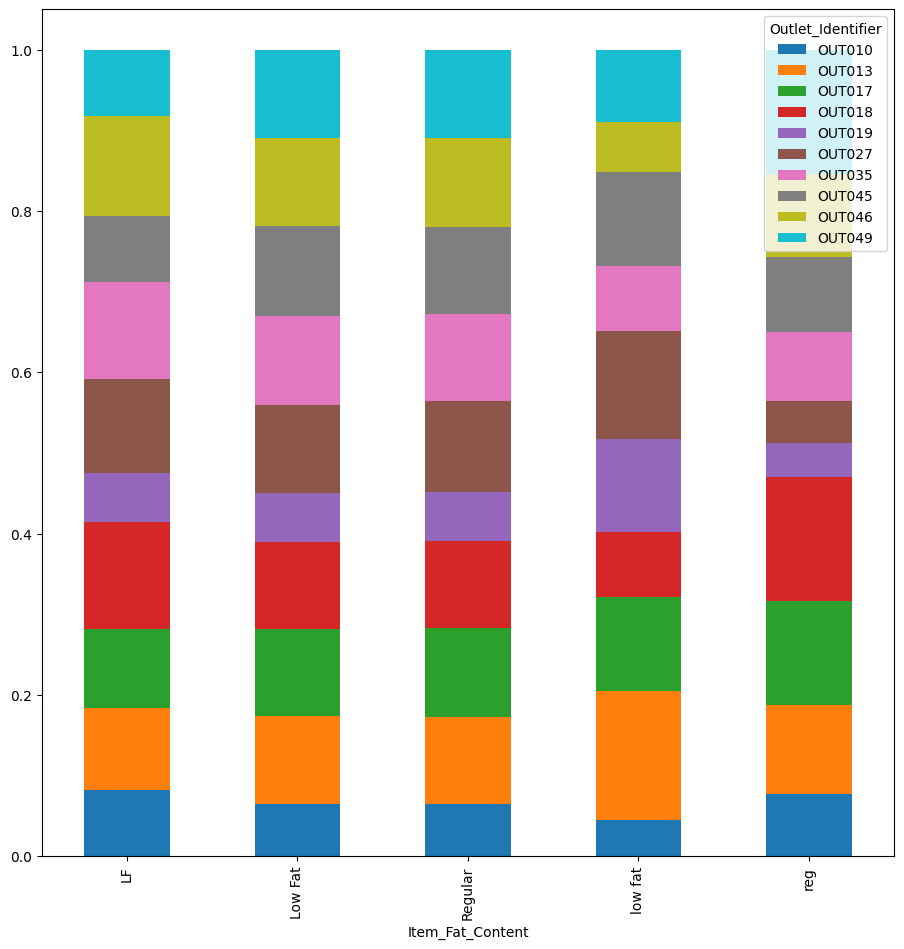

In [25]:
# fat content vs outlet identifier
Item_Fat_Content = pd.crosstab(data_train['Item_Fat_Content'],data_train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

<IPython.core.display.Javascript object>

<Axes: xlabel='Item_Type'>

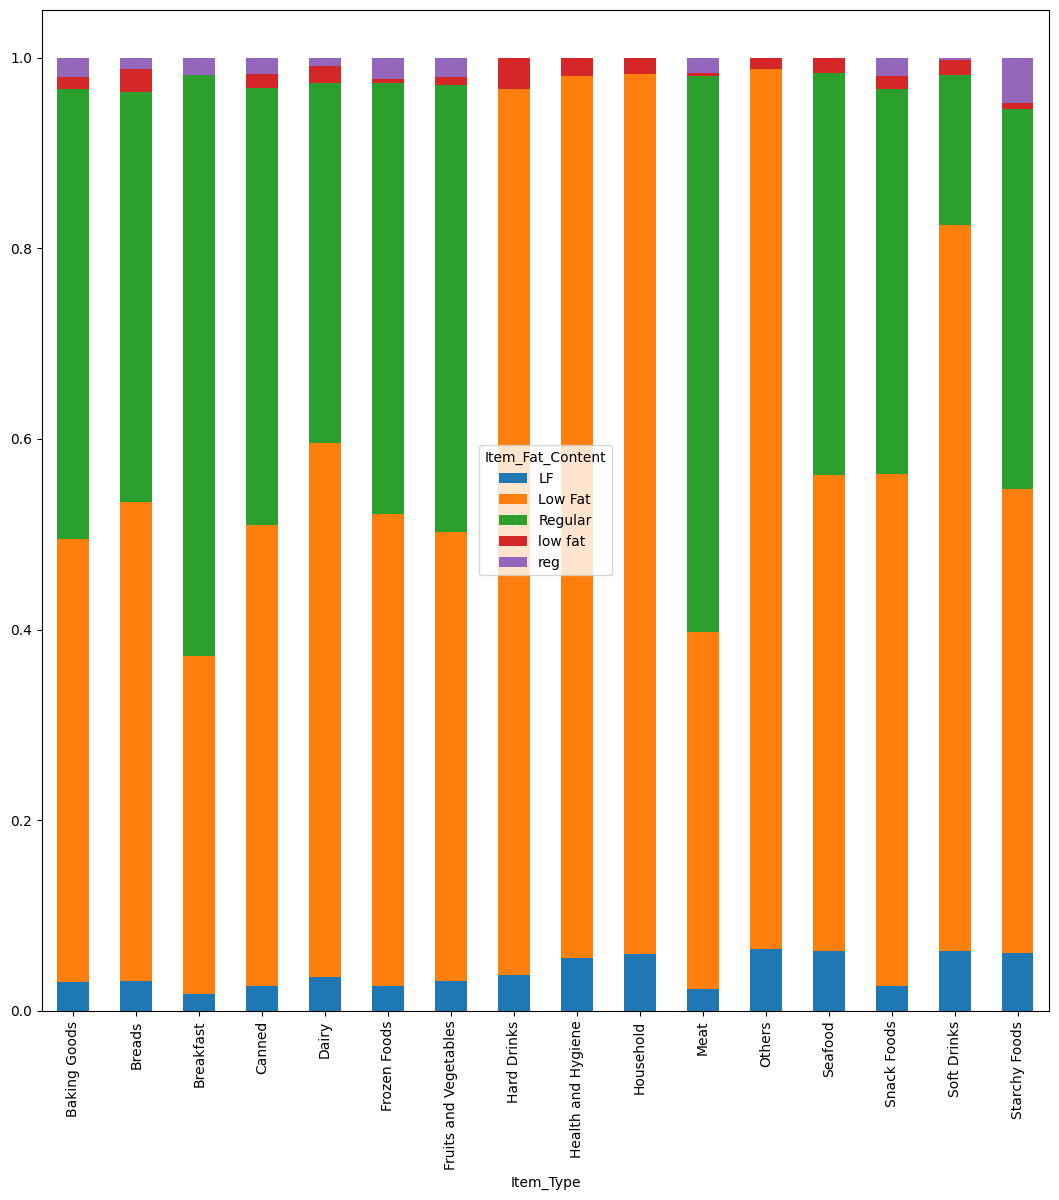

In [26]:
# fat content vs item type
Item_Type = pd.crosstab(data_train['Item_Type'],data_train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))


In [27]:
data_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [28]:
data_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

#preprocessing

In [29]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_train = data_train.apply(le.fit_transform)
data_test = data_test.apply(le.fit_transform)
data_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,404,1,66,13,1460,4,1,0,1
1,223,4,1714,4,965,7,1,1,1
2,338,1,4042,11,4076,3,1,2,0
3,156,1,388,13,2522,7,1,1,1
4,319,2,4423,4,3972,0,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,293,2,290,13,2164,2,2,0,1
5677,178,2,4815,15,2833,8,1,2,2
5678,288,1,3256,8,1752,5,1,1,1
5679,349,2,0,3,3691,7,1,1,1


In [31]:
pip install pandas-profiling

In [30]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_train, title="Pandas Profiling Report")

<ipython-input-30-ef3712ee687f>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [32]:
#performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(data_train)
klib.data_cleaning(data_test)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.54 MB (-83.08%)

Shape of cleaned data: (5681, 9) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.32 MB (-82.05%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,404,1,66,13,1460,4,1,0,1
1,223,4,1714,4,965,7,1,1,1
2,338,1,4042,11,4076,3,1,2,0
3,156,1,388,13,2522,7,1,1,1
4,319,2,4423,4,3972,0,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,293,2,290,13,2164,2,2,0,1
5677,178,2,4815,15,2833,8,1,2,2
5678,288,1,3256,8,1752,5,1,1,1
5679,349,2,0,3,3691,7,1,1,1


In [33]:
# converts existing to more efficient dtypes
klib.convert_datatypes(data_train)
klib.convert_datatypes(data_test)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,404,1,66,13,1460,4,1,0,1
1,223,4,1714,4,965,7,1,1,1
2,338,1,4042,11,4076,3,1,2,0
3,156,1,388,13,2522,7,1,1,1
4,319,2,4423,4,3972,0,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,293,2,290,13,2164,2,2,0,1
5677,178,2,4815,15,2833,8,1,2,2
5678,288,1,3256,8,1752,5,1,1,1
5679,349,2,0,3,3691,7,1,1,1


In [34]:
# cleans and standardizes column names, also called inside data_cleaning()
klib.clean_column_names(data_train)
klib.clean_column_names(data_test)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,404,1,66,13,1460,4,1,0,1
1,223,4,1714,4,965,7,1,1,1
2,338,1,4042,11,4076,3,1,2,0
3,156,1,388,13,2522,7,1,1,1
4,319,2,4423,4,3972,0,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,293,2,290,13,2164,2,2,0,1
5677,178,2,4815,15,2833,8,1,2,2
5678,288,1,3256,8,1752,5,1,1,1
5679,349,2,0,3,3691,7,1,1,1


In [35]:
# pools subset of cols based on duplicates with min. loss of information
klib.pool_duplicate_subsets(data_train)
klib.pool_duplicate_subsets(data_test)

,item_visibility,item_mrp,pooled_vars
0,66,1460,0
1,1714,965,1
2,4042,4076,2
3,388,2522,3
4,4423,3972,4
...,...,...,...
5676,290,2164,2436
5677,4815,2833,5677
5678,3256,1752,5678
5679,0,3691,5679


In [36]:
#One hot encoding_datatrain
data_train= pd.get_dummies(data_train, columns=['item_fat_content','outlet_size','outlet_location_type','outlet_type'])


<IPython.core.display.Javascript object>

In [37]:
#One hot encoding_datatest
data_test= pd.get_dummies(data_test, columns=['item_fat_content','outlet_size','outlet_location_type','outlet_type'])

<IPython.core.display.Javascript object>

#Splitting data into train and test

In [38]:
X=data_train.drop('item_outlet_sales',axis=1)
Y=data_train['item_outlet_sales']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

#Standarization

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

#Model Building(Linear regression)

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_std, Y_train)
Y_pre_lr=lr.predict(X_test_std)

#Model Building(SGDRegressor)

In [42]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(X_train_std, Y_train)
Y_pre_sgd=sgd.predict(X_test_std)

#Evaluat the model (Linear regression )


In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(Y_test, Y_pre_lr))
print(mean_absolute_error(Y_test, Y_pre_lr))
print(np.sqrt(mean_squared_error(Y_test, Y_pre_lr)))
print(mean_squared_error(Y_test, Y_pre_lr))

0.6240838339540561
446.01322525484784


<IPython.core.display.Javascript object>

557.9446252150833
311302.20480639976


#Evaluat the model (SGDRegressor )


In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(Y_test, Y_pre_sgd))
print(mean_absolute_error(Y_test, Y_pre_sgd))
print(np.sqrt(mean_squared_error(Y_test, Y_pre_sgd)))
print(mean_squared_error(Y_test, Y_pre_sgd))

0.6238883304194949
447.03672912425344


<IPython.core.display.Javascript object>

558.0896920909853
311464.1044182108


#Another way
Ridge/
PolynomialFeatures/
pipeline


In [44]:
#import Libraries
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
# Assuming X_train and y_train are the training features and target variable respectively
# Regularization: Apply Ridge regression
model = make_pipeline(Ridge(alpha=0.5))
model.fit(X_train_std,Y_train)

Pipeline(steps=[('ridge', Ridge(alpha=0.5))])

In [46]:
# Feature Engineering: Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_std= poly.fit_transform(X_train)

In [47]:
# Regularization: Apply Ridge regression
model = make_pipeline(Ridge(alpha=0.5))
model.fit(X_train_std,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.22699e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('ridge', Ridge(alpha=0.5))])

In [48]:
# Predicting on the training set
y_train_pred = model.predict(X_train_std)

r2_score/RMSE

In [50]:
rmse = mean_squared_error(Y_train, y_train_pred, squared=False)
print(rmse)
print(r2_score(Y_train, y_train_pred))

528.6180916501265
0.6698779644209416
